<font size=7>Animate Seizure Event

# Setup

Here we check to see if there are any interesting patterns during the seizure event.

In [1]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves
from human_hip.animate import animate_waves
from human_hip.spike_data import read_autocurated_data, plot_raster


In [2]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [3]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

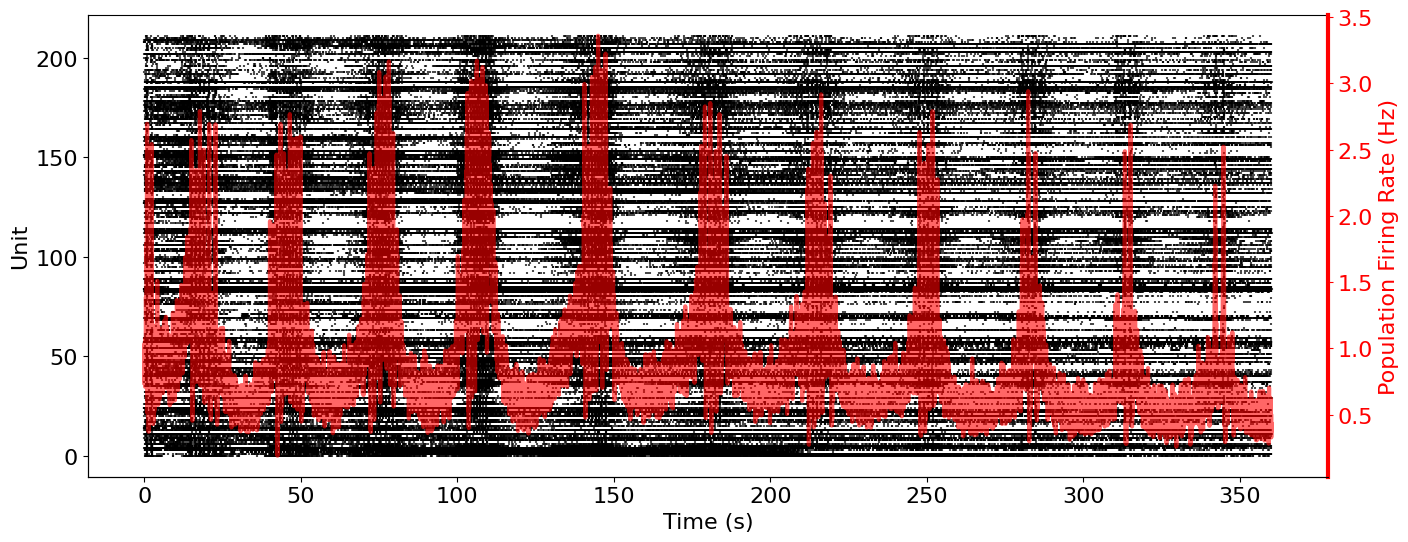

In [4]:
plot_raster( sd )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

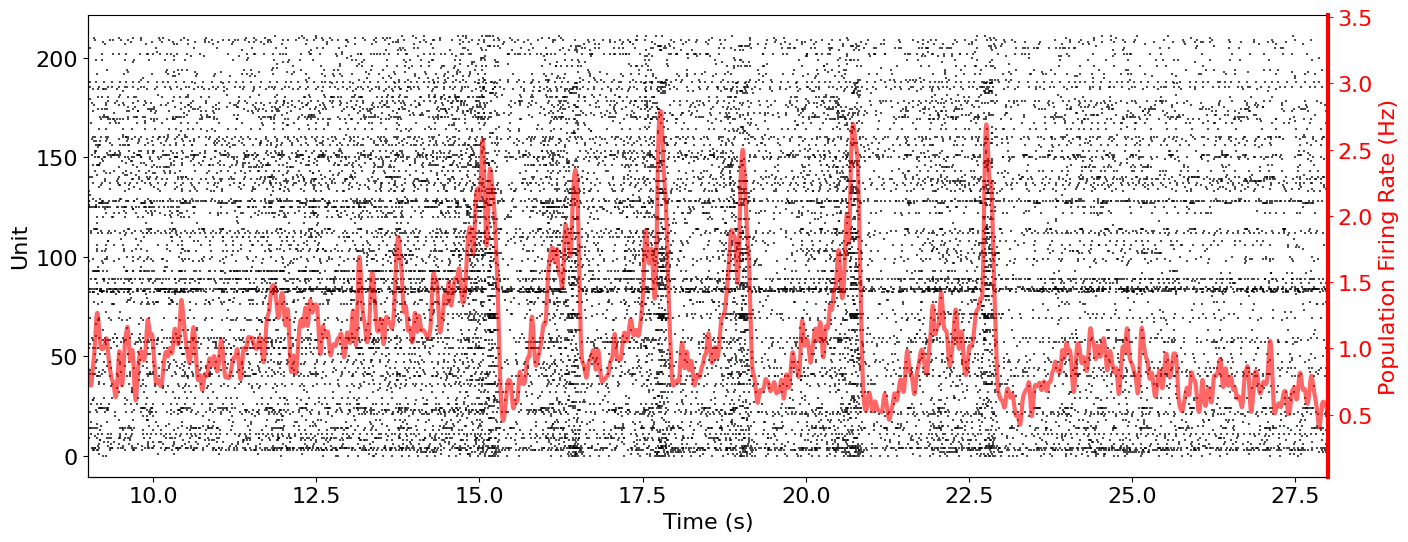

In [5]:
plot_raster( sd , xlim=(9, 28))

# Theta

Making animation of 1.333 minutes
Saved animation to media/hc112823_acid1_theta_start9s_range_5000_9000_5.mp4


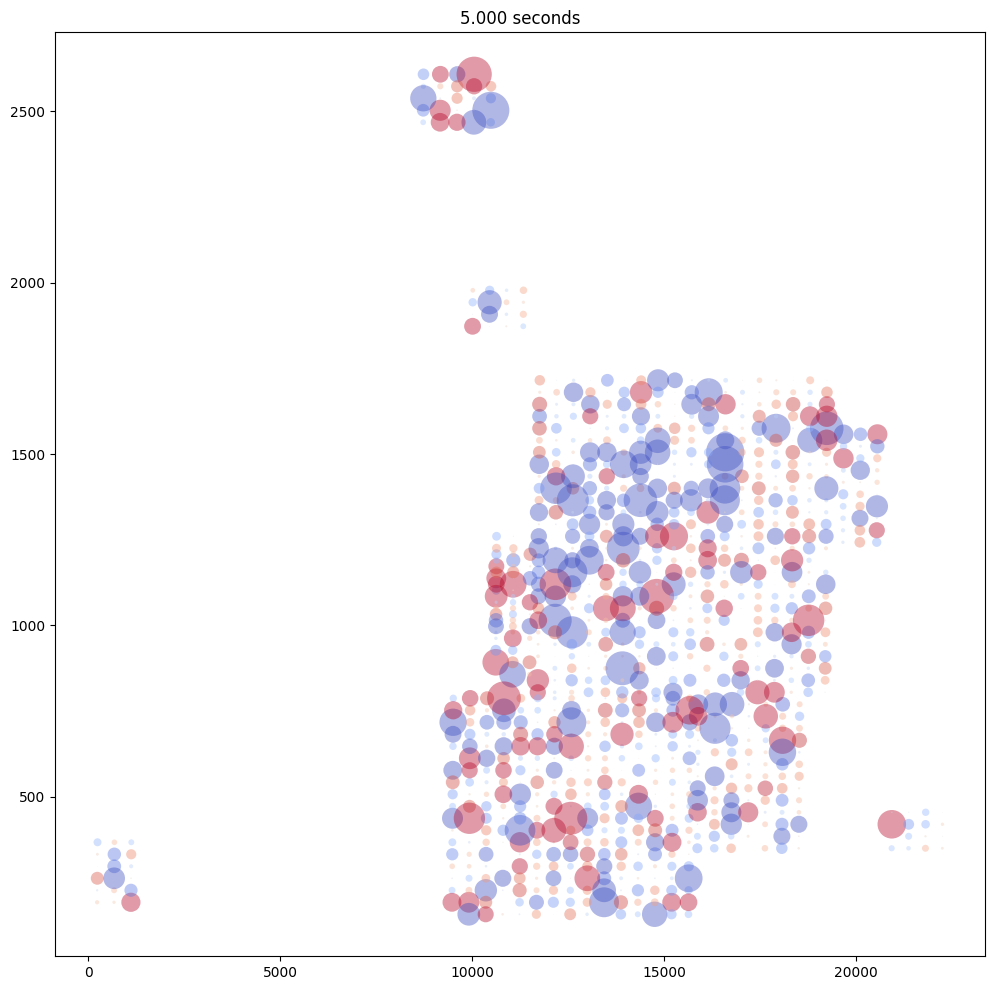

In [20]:
animate_waves(data_raw, wave_type="theta", movie_range_ms=range(5000,9000,5), filename='media/hc112823_acid1_theta_start9s_range_5000_9000_5.mp4' )

Making animation of 2.667 minutes
Saved animation to media/hc112823_acid1_theta_start9s_range_1000_9000_5.mp4


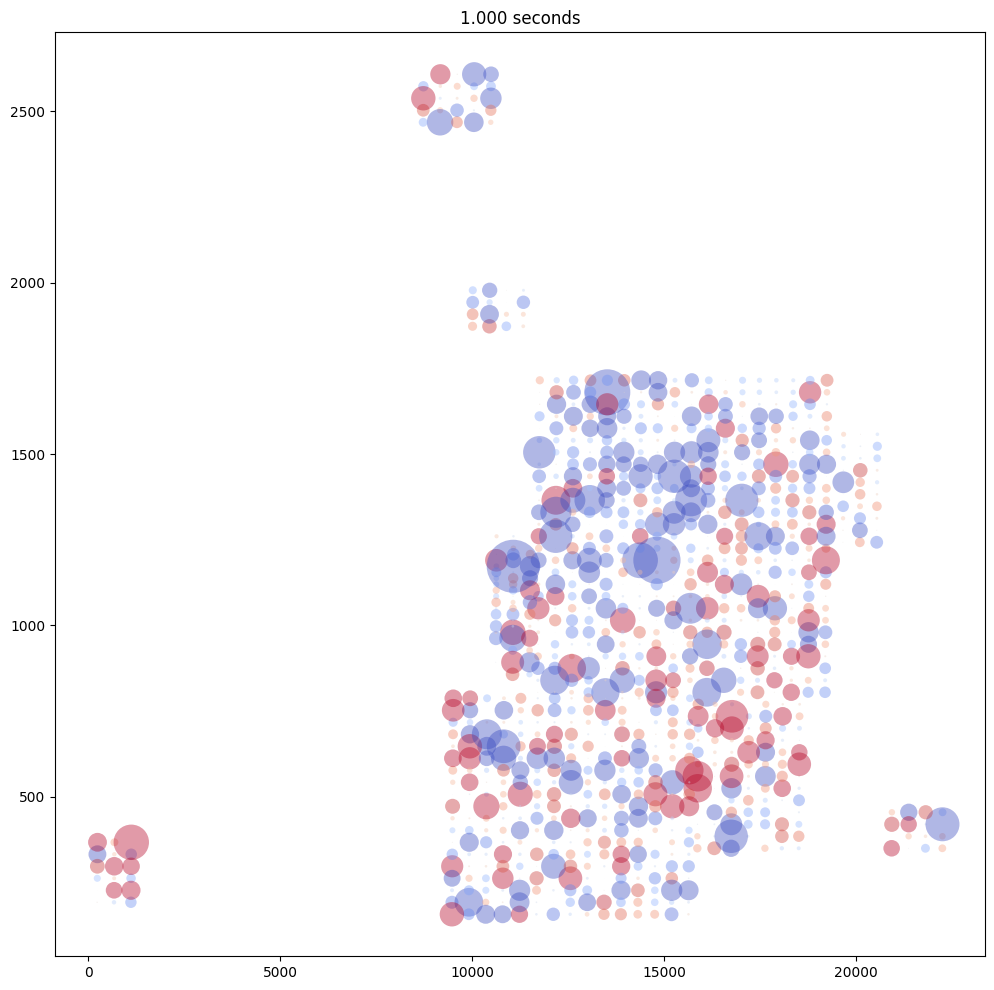

In [19]:
animate_waves(data_raw, wave_type="theta", movie_range_ms=range(1000,9000,5), filename='media/hc112823_acid1_theta_start9s_range_1000_9000_5.mp4' )

# Alpha

Making animation of 4.445 minutes


Saved animation to media/hc112823_acid1_alpha_start9s_range_1000_9000_3.mp4


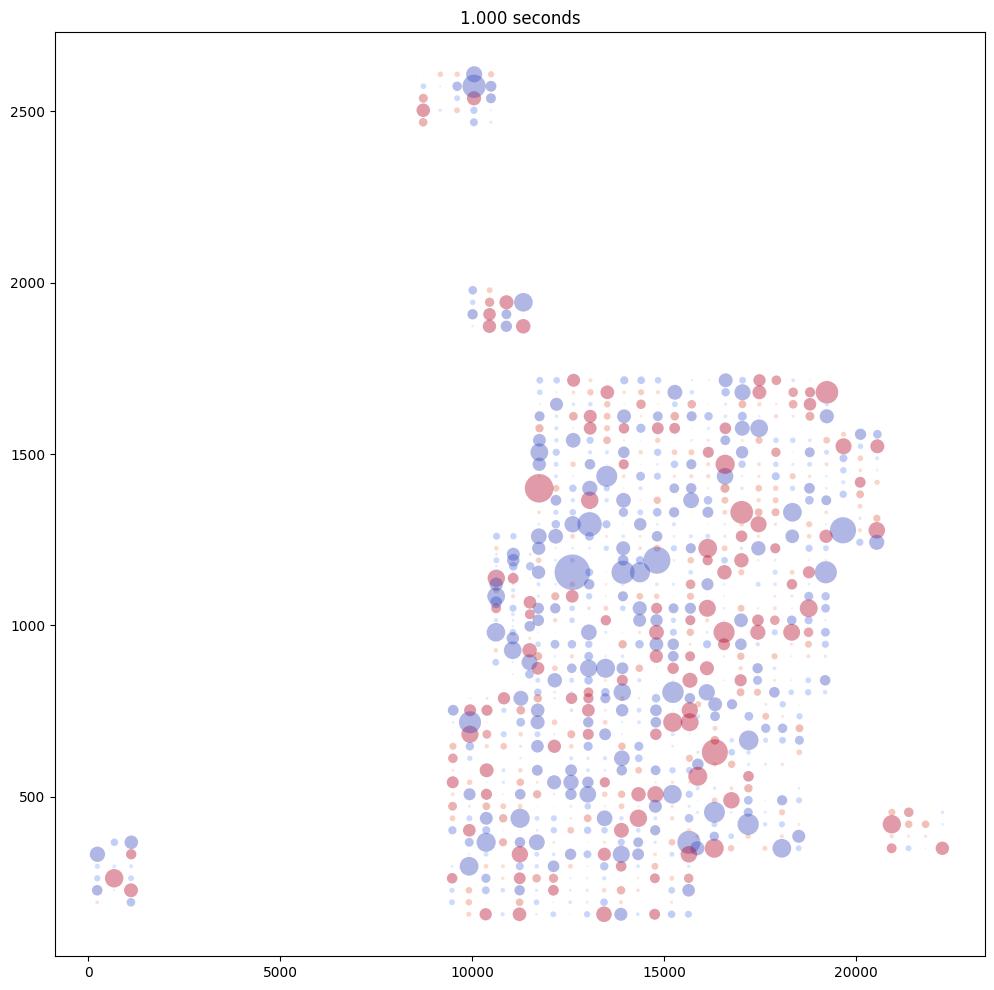

In [18]:
animate_waves(data_raw, wave_type="alpha", movie_range_ms=range(1000,9000,3), filename='media/hc112823_acid1_alpha_start9s_range_1000_9000_3.mp4' )

# <font color="brown"> Spike Raster

## <font color="brown">Create spike raster with line

In [29]:
import matplotlib.pyplot as plt
from braingeneers.analysis.analysis import SpikeData
from scipy.ndimage import gaussian_filter1d
import numpy as np


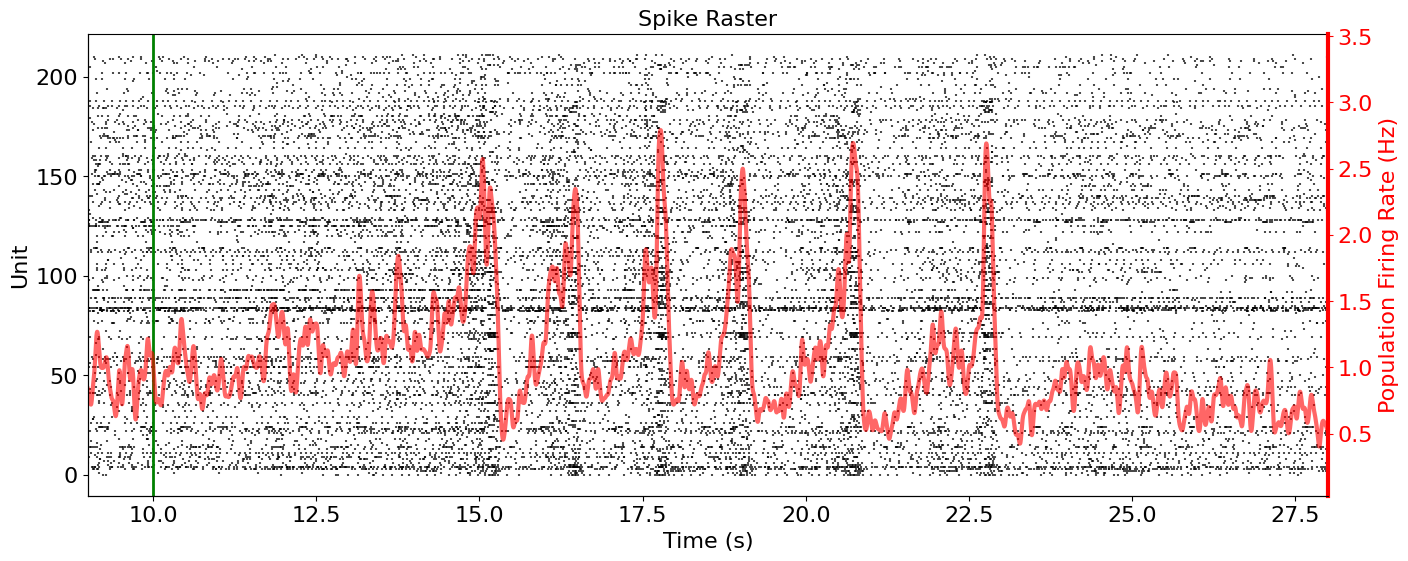

In [45]:
xlim=(9, 28)
smoothness=20
size=(16,6) 

pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=smoothness)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000


fig, axs = plt.subplots(1, 1, figsize=size )
axs.set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    axs.scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
axs.set_xlabel("Time (s)", fontsize=16)
axs.set_ylabel("Unit", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)

axs1 = axs.twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim(xlim)
#axs1.set_ylim(ylim)

axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = axs.axvline(x=10, color='green', linewidth=2, linestyle='-')
 


## <font color="brown"> Get Theta Code

In [41]:


from human_hip.raw_data import get_brain_waves
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation


In [42]:
raw_dict = data_raw
wave_type="theta"
movie_range_ms=range(5000,9000,5)
filename='media/hc112823_acid1_theta_raster_start9s_range_5000_9000_5.mp4'

frame_interval_ms=100
size_exp=1.9
size_scale=90

Making animation of 1.333 minutes


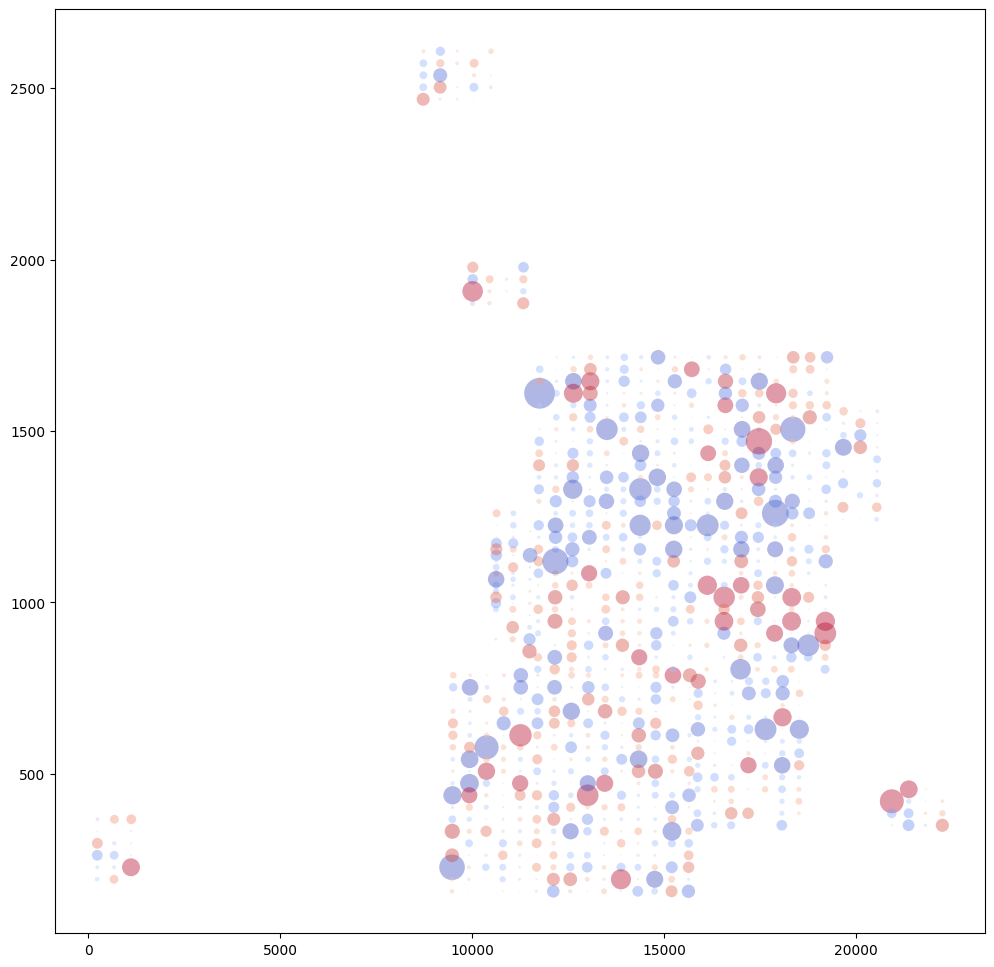

In [44]:


# Create initial plot to feed into animator
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( raw_dict['xy'][:,0], raw_dict['xy'][:,1], c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.4 , edgecolor='none' )

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**size_exp)*size_scale
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter
# anim = FuncAnimation(fig, animate, frames=movie_range_ms , interval=frame_interval_ms, blit=False)
# anim.save( filename )
# print( f"Saved animation to {filename}" )


## <font color="brown"> Combine

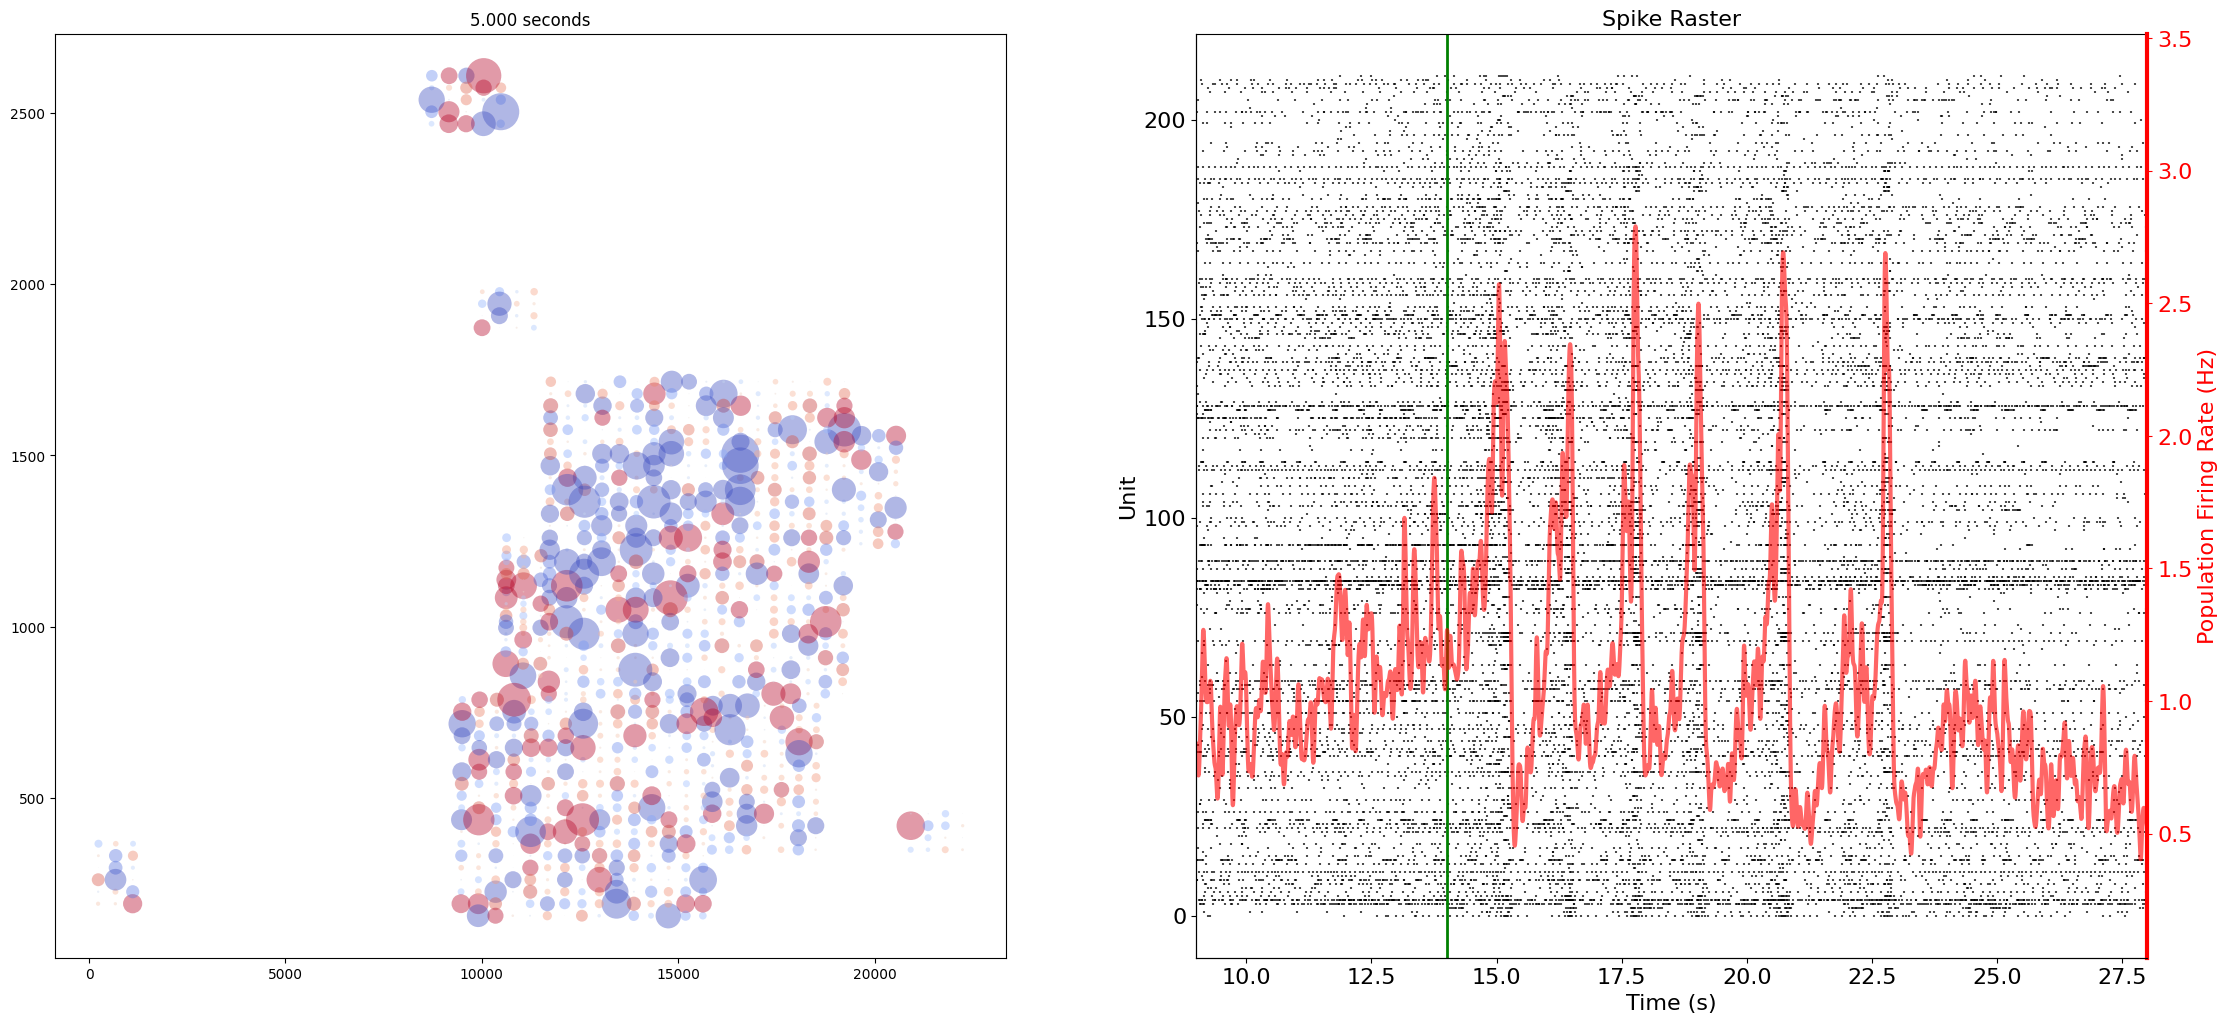

In [49]:

fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

### Code for Theta Plot ###
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( raw_dict['xy'][:,0], raw_dict['xy'][:,1], c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.4 , edgecolor='none' )

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim((9, 28))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**size_exp)*size_scale
    plots[0].set_title(f"{i/1000:.3f} seconds")
    # Raster Plot
    t = 9 + i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=range(5000,9000,5), interval=100, blit=False)  
anim.save( 'media/hc112823_acid1_theta_raster_start9s_range_5000_9000_5.mp4' )